# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [2]:
import numpy as np

In [25]:
def linan(str1, str2):
    vec1 = list(map(lambda x: float(x), str1.split(" ")))
    vec2 = list(map(lambda x: float(x), str2.split(" ")))
    matrix = np.array([vec1, vec2])
    res = np.linalg.solve(matrix[:,:-1], matrix[:,-1].T)
    for x in np.nditer(res):
            print("{:.3f}".format(x), end=' ')
        

linan("1 4 1", "3 10 2")

-1.000 0.500 

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [57]:
def decorate_matrix(n):
    a = np.zeros((n - 2, n - 2))
    a = np.pad(a, (1, 1), constant_values=1)
    return a
    
decorate_matrix(5) 

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [33]:
from scipy.optimize import minimize

In [47]:
def gen_func(a, b):
    def f(x):
        return (x + a) ** 2 - b
    
    
    def g(x):
        return abs(f(x))
    return f, g

f, g = gen_func(3, 4)
a = minimize(f, 0).x
b = minimize(g, 0).x
print("%.3f" % a, "%.3f" % b)

-3.000 -1.000


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

In [42]:
import matplotlib.pyplot as plt

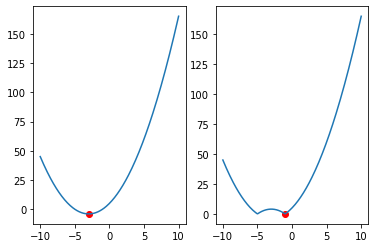

In [54]:
x = np.linspace(-10, 10, 200)
f_y = list(map(f, x))
g_y = list(map(g, x))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, f_y)
ax1.scatter(a, f(a), c="red")
ax2.plot(x, g_y)
ax2.scatter(b, g(b), c="red")

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [23]:
from scipy.stats import binom


def find_prop(one_coin_prop, n_toss, n_tries, n_succ):
    all_coins_prop = (one_coin_prop ** n_toss) * 2
    return binom.pmf(n_succ, n_tries, all_coins_prop)
    
one_coin_prop = 0.5
n_toss_first = 10
n_toss_second = 8
n_tries = 1000
n_succ = 0

print(f' The first task - {1 - find_prop(one_coin_prop, n_toss_first, n_tries, n_succ):.4f}')
print(f' The second task - {1 - find_prop(one_coin_prop, n_toss_second, n_tries, n_succ):.4f}')
n_succ = 3
print(f' The third task - {find_prop(one_coin_prop, n_toss_first, n_tries, n_succ):.4f}')

 The first task - 0.8584
 The second task - 0.9996
 The third task - 0.1763
